# 手写数字识别

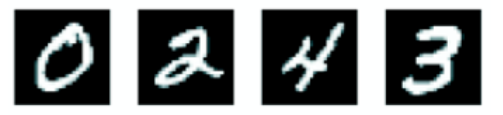

### 问题：分类问题（10类）

### 输入：灰度图像（28×28个像素）

### 输出：分类0-9

# 1.导入数据

### 原始数据（来自keras.datasets.mnist）

In [1]:
# 导入数据
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #mnist.load_data('路径')为下载并保存数据集位置，默认位置在C:\Users\管理员\.keras


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

# 2.查看数据

### 1.查看数据级格式 print(数据集.shape) 
 >一个图片训练集格式为4层，即[训练集图片数[图片长[图片宽[灰度值]]]] 

### 2.画出图片
>from PIL import Image    
>>图片变量名 = Image.open(图片路径)

>import matplotlib.pyplot as plt 
>>设置画板样式：plt.subplot(共几行,共几列,第几个图片) 
>>画板上放置图片：plt.imshow(图片变量名)
>>显示画板：plt.show() 

训练集图片数量、长、宽
(60000, 28, 28)
(60000,)
测试集图片数量、长、宽
(10000, 28, 28)
训练集：
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4]


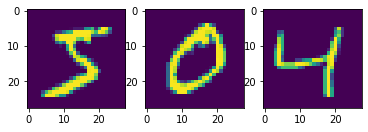

In [2]:
# 查看数据

# 查看训练集格式数量 print(样本集.shape)
print("训练集图片数量、长、宽")
print(train_images.shape)
print(train_labels.shape)
print("测试集图片数量、长、宽")
print(test_images.shape)

# 查看前3个训练集（训练图片与标签）
print("训练集：")
print(train_images[0:3])
print(train_labels[0:3])

# 画出一个训练集  plt.subplot(共几行,共几列,第几个图片)
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.subplot(1,3,2)
plt.imshow(train_images[1])
plt.subplot(1,3,3)
plt.imshow(train_images[2])
plt.show()

# 3.构建神经网络模型

### 1.创建序列模型 model = Sequential() 
### 2.模型添加层 add(层(神经元, input_dim=输入维度, activation='激活函数')) 
### 3.查看模型 print(model.summary())


---

#### 1.model模型：
>**线性模型Sequential （from tensorflow.keras import Sequential)**  
>**用法：model = Sequential()**

#### 2.layer：
>**添加layer：model.add(层名(units=该层神经元个数/输出空间维度, input_dim=输入该层维度, activation='激活函数'))**  
>神经元个数确定： 
>>输入层：输入维度   
>>输出层：输出维度（分类问题分类类别数)   
>>隐藏层：训练集样本数/(a*(输入层神经元个数+输出层神经元个数))  a取2-10    
>>>！隐藏层中使用太少的神经元将导致欠拟合；隐藏层中的神经元过多可能会导致过拟合  
>>>！隐藏神经元的数量应在输入层的大小和输出层的大小之间，隐藏神经元的数量应小于输入层大小的两倍  

>隐藏层层数确定：
>>没有隐藏层：仅能够表示线性可分函数或决策   
>>隐藏层数=1：可以拟合任何“包含从一个有限空间到另一个有限空间的连续映射”的函数  
>>隐藏层数=2：搭配适当的激活函数可以表示任意精度的任意决策边界，并且可以拟合任何精度的任何平滑映射  
>>隐藏层数>2：多出来的隐藏层可以学习复杂的描述 
   
 

### 方法一:全连接层Dense
神经网络构建

输入层：784个像素（一张图28*28）

输出层：10个神经元（数字识别0-9分为10类）
    
---
#### 全连接层Dense 【from tensorflow.keras.layers import Dense】
>**Dense(units=该层神经元个数, input_dim=输入该层维度, activation='激活函数')**

#### 正则化Dropout 【from tensorflow.keras.layers import Dropout】
>两个全连接层之间插入，从而减少过拟合（当训练集里最好的acc大于测试集acc，认为过拟合  
>**Dropout(rate=需要丢弃的输入比例0-1)**   rate一般为0.2-0.5 
  
#### 激活函数Activation （from tensorflow.keras.layers import Activation）
>输出层：
>>**activation='linear':**用于回归任务输出层  
>>**activation='softmax':**用于分类任务输出层（输出值为分为该类的概率）

In [ ]:
# 搭建神经网络
from tensorflow import keras
from tensorflow.keras import Sequential #模型
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten #层


# 创建序列模型
model = Sequential()

# 添加layer层 add(模型(参数))
# 输入层 神经元28*28(一维数据)

# 第一个隐藏层（输入图像28*28，输入数据为784维）
model.add(Dense(512, activation='relu', input_dim=28*28)) 
model.add(Dropout(0.01))

# 第二个隐藏层
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.01))

# 输出层，有10个神经元，每个神经元对应一个类别，输出值表示样本属于该类别的概率大小
model.add(Dense(10, activation='softmax'))  

### 方法二:卷积神经网络 卷积Conv2D 池化MaxPooling2D
神经网络构建

输入层：784个像素（一张图28,28,1）

输出层：10个神经元（数字识别0-9分为10类）
    
---

#### 卷积层Conv2D 【from tensorflow.keras.layers import Conv2D】
>通过滤波器锐化图片，突出图片细节
>>**Conv2D(filters=过滤器数量, (卷积窗口长,卷积窗口宽), activation='激活函数', input_shape=(图片长,图片宽,灰度))** 

#### 池化层MaxPooling2D 【from tensorflow.keras.layers import Dropout】
>压缩图片，遍历n个像素组并选取最大值作为该组的像素代表   
>>**MaxPooling2D(池化窗口长, 池化窗口宽)** 
 
#### 激活函数Activation （from tensorflow.keras.layers import Activation）
>输出：
>>activation='linear':用于回归任务输出层  
>>activation='softmax':用于分类任务输出层（输出值为分为该类的概率）

In [3]:
# 搭建卷积神经网络
from tensorflow import keras
from tensorflow.keras import Sequential #模型
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten #层


# 创建序列模型
model = Sequential()

# 添加layer层 add(模型(参数))
# 输入层 神经元(28,28,1)

# 第一个隐藏层 卷积池化
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(2,2))

# 第二个隐藏层 卷积池化
model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D(2,2))

# 将图片数据压成一维数据
model.add(Flatten())

#第三个隐藏层 全连接层
model.add(Dense(128, activation='relu'))

# 输出层，有10个神经元，每个神经元对应一个类别，输出值表示样本属于该类别的概率大小
model.add(Dense(10, activation='softmax'))  


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------------------------------------------------------------------------------

In [4]:
# 查看构建的网络模型
print(model.summary())

# Layer层 
# Output shape神经元个数
# Param可训练参数数（全连接层Dense可训练参数数=神经元个数*输入参数数+偏置）

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# 4.数据预处理

### 1.数据集格式转换
>数据集.reshape(外层元素个数, 内层元素个数)  
>灰度图像缺少灰度值层时，若要使用卷积神经网络CNN的卷积层Conv2D，需要给灰度一个默认值，增加一层  
>>**import numpy as np  
>>图片数据集 = np.expand_dims(图片数据集, -1)**  

### 2.标签进行one-hot编码 
>from tensorflow.keras import utils
>>utils.to_categorical(标签)

### 方法一：序列模型数据预处理

将数据变为1维，即train_images = train_images.reshape(图片数, 一个图片的像素数)

In [ ]:
# 序列模型数据预处理

# 将[0,255]区间的整数转换为[0,1]之间的浮点数
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 数据预处理，图像二维数据转换为一维数据
# 将一个图像所有像素作为一行（一个列表） .reshape(图片数, 一个图片的像素数)
train_images = train_images.reshape((60000, 28 * 28))    #6000个图片，每个图片28*28个像素；将图片集合转换为6000行，784列
test_images = test_images.reshape((10000, 28 * 28))


### 方法二：卷积神经网络数据预处理

将数据变为4维，增加灰度维度，即train_images = np.expand_dims(train_images, -1)

In [5]:
# 卷积神经网络数据预处理

# 将[0,255]区间的整数转换为[0,1]之间的浮点数
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# 数据预处理
# 解决维度报错，导入训练数据时，如果数据没有指定灰度，也要给一个默认值。也就是要默认增加一维。
import numpy as np
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)


---

In [6]:
# 对分类标签y进行one-hot编码  utils.to_categorical(标签列表, num_classes=标签类别数, dtype='编码后标签格式')
from tensorflow.keras import utils

print("编码前")
print(train_labels)

train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

print("编码后")
print(train_labels)

编码前
[5 0 4 ... 5 6 8]
编码后
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# 5.编译模型及训练模型
### 1.编译：确定优化器和损失函数 
>model.compile(optimizer='优化器' , loss='损失函数' , metrics=['监控指标'])

### 2.训练：确定训练的数据、轮数、每次训练样本数 
>model.fit(训练数据, 训练标签, epochs=训练回合数, batch_size=每次训练给的数据量)

### 3.保存：保存训练的模型
>model.save('模型.h5')

### 4.验证：查看测试集上预测效果
>test_loss, test_acc = model.evaluate(测试集, 测试标签)

In [7]:
# 编译模型 .compile(optimizer='优化器' , loss='损失函数' , metrics=['监控指标'])
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [8]:
# 训练模型 .fit(训练数据, 训练标签, epochs=训练回合数, batch_size=每次训练给的数据量)
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# 保存模型 .save('模型.h5')
model.save('number_model.h5')

Epoch 1/5
60000/60000 [==============================] - 19s 310us/sample - loss: 0.1755 - acc: 0.9459
Epoch 2/5
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0479 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0324 - acc: 0.9898
Epoch 4/5
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0236 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0176 - acc: 0.9948


In [9]:
# 利用测试集测试模型性能 .evaluate(测试数据, 测试标签)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_loss:', test_loss , 'test_accuracy:', test_acc)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.0229 - acc: 0.9931
test_loss: 0.022892402262571703 test_accuracy: 0.9931


# 6.预测
#### 1.载入模型
>from tensorflow.keras.models import load_model  
>model = load_model('模型名.h5')

#### 2.预测
>model.predict(预测输入列表)  
>注意：预测的数据必须单独放在一个列表里

In [ ]:
#序列神经网络

# 导入数据
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 取一张图片
pic = test_images[0]

# 画出图片
import matplotlib.pyplot as plt
plt.imshow(pic)

# 图片格式处理
pic = pic.reshape(1,28*28)    # 把图片格式转换为1行784列
pic = pic.astype('float32') / 255  # 均值化
print(pic)



# 导入模型
from tensorflow.keras.models import load_model

model = load_model('number_model.h5')
pre = model.predict(pic)
print(pre)


for each in pre:
    each = each.tolist()
    index = each.index(max(each))
    print(index)

[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[[1.58073199e-08 9.99968171e-01 5.16089429e-08 3.51269222e-11
  1.31678635e-05 3.40177841e-09 1.34649998e-08 1.29404425e-05
  5.43068700e-06 2.05644270e-07]]
1


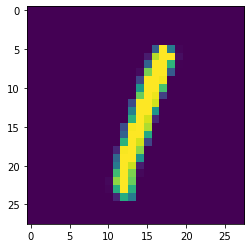

In [10]:
#卷积神经网络


import numpy as np

# 导入数据
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 取一张图片
pic = test_images[5]

# 画出图片
import matplotlib.pyplot as plt
plt.imshow(pic)

# 图片格式处理
pic = pic.astype('float32') / 255  # 均值化
pic = np.expand_dims(pic, -1) #增加灰度维度

pic = pic.reshape(1,28,28,1)

print(pic)




# 导入模型
from tensorflow.keras.models import load_model

model = load_model('number_model.h5')
pre = model.predict(pic)
print(pre)


for each in pre:
    each = each.tolist()
    index = each.index(max(each))
    print(index)


